# Tempi di esecuzione

In [1]:
import matplotlib.pyplot as plt

from dataset import results
from dataset.data import *

%matplotlib inline

## Dati energetici 1 e 2

In [2]:
min_1 = {t: [results.load_data(RESULTS_STATIC_ENERGY[t][i][1])['time'] for i in INSTS] for t in TIMES}
min_2 = {t: [results.load_data(RESULTS_STATIC_ENERGY[t][i][2])['time'] for i in INSTS] for t in TIMES}

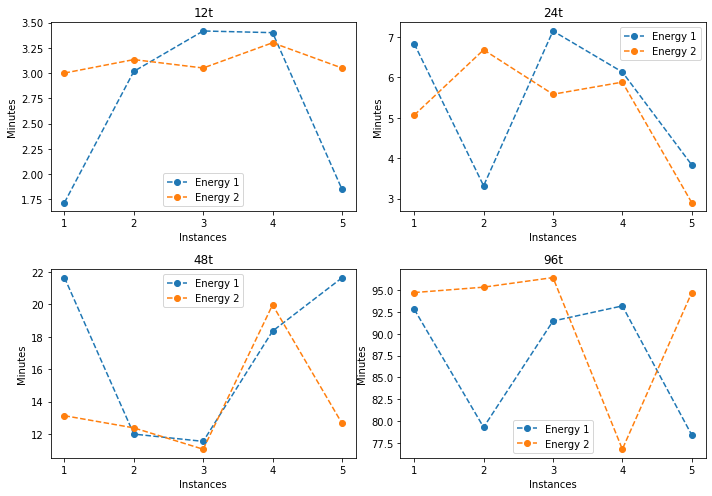

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
plt.setp(axes, xticks=INSTS)

for i, t in enumerate(TIMES):
    plt.sca(axes[0 if i < 2 else 1][i%2])
    plt.plot(INSTS, min_1[t], marker='o', linestyle='--', label='Energy 1')
    plt.plot(INSTS, min_2[t], marker='o', linestyle='--', label='Energy 2')
    plt.xlabel('Instances')
    plt.ylabel('Minutes')
    plt.title('{}t'.format(t))
    plt.legend()

fig.tight_layout()

## Dati energetici basati sulle distanze

Dati energetici calcolati su istanze da 48 slot times con riferimento ai dati energetici 2.

In [4]:
min_d2 = {func: [results.load_data(RESULTS_DISTANCES_ENERGY[48][i][2][func])['time'] \
                 for i in INSTS] for func in FUNCS}

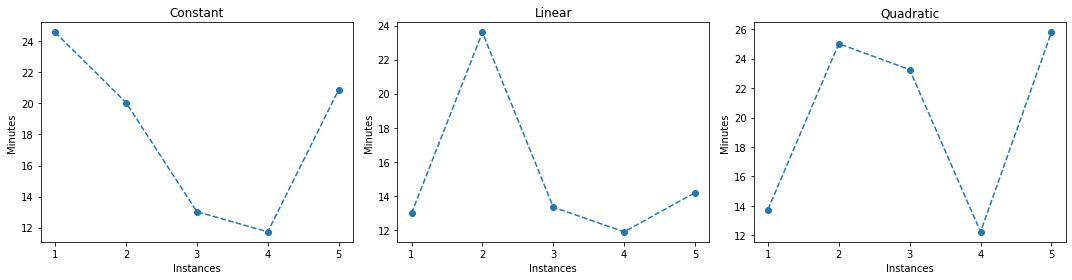

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
plt.setp(axes, xticks=INSTS)
for i, func in enumerate(min_d2):
    plt.sca(axes[i])
    plt.plot(INSTS, min_d2[func], marker='o', linestyle='--')
    plt.xlabel('Instances')
    plt.ylabel('Minutes')
    plt.title(func.capitalize())

fig.tight_layout()

## Confronto dati energetici

### Media di ogni istanza

In [6]:
avg_inst = {t: [(min_1[t][i]+min_2[t][i])/2 for i in range(5)] for t in TIMES}
avg_inst['48t dis'] = [sum([min_d2[func][i] for func in FUNCS]) / 3 for i in range(5)]

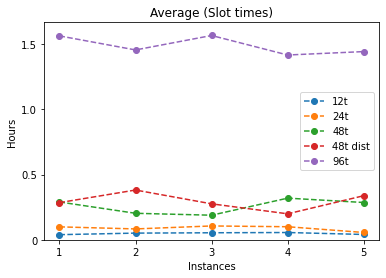

In [7]:
for el in [12, 24, 48, '48t dis', 96]:
    plt.plot(INSTS, avg_inst[el], marker='o', linestyle='--', label='{}t'.format(el))
plt.xticks(INSTS)
plt.yticks([0, 30, 60, 90], ['0', '0.5', '1.0', '1.5'])
plt.ylim(0, 100)
plt.xlabel('Instances')
plt.ylabel('Hours')
plt.title('Average (Slot times)')
plt.legend()
plt.show()

### Media di ogni slot time

In [8]:
avg_t = [sum(avg_inst[t])/5 for t in avg_inst]
avg_t[3], avg_t[4] = avg_t[4], avg_t[3]

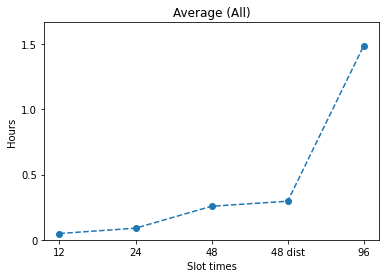

In [9]:
plt.plot(range(1, 6), avg_t, marker='o', linestyle='--')
plt.xticks(range(1, 6), [12, 24, 48, '48 dist', 96])
plt.yticks([0, 30, 60, 90], ['0', '0.5', '1.0', '1.5'])
plt.ylim(0, 100)
plt.xlabel('Slot times')
plt.ylabel('Hours')
plt.title('Average (All)')
plt.show()